In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import sklearn
from sklearn.utils import resample

In [176]:
df=pd.read_csv("clean_kaggle_data.csv")

C:\Users\le985\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [177]:
df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,25967,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15387,25968,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15388,25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15389,25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


# Question 1: Perform exploratory data analysis

In [64]:
#taking a look at the unique values in the gender(Q2) column
np.unique(df['Q2'],return_counts=True)

(array(['Man', 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe',
        'Woman'], dtype=object),
 array([12642,    47,   196,    24,  2482], dtype=int64))

In [68]:
np.unique(df['Q1'],return_counts=True)

(array(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49',
        '50-54', '55-59', '60-69', '70+'], dtype=object),
 array([ 931, 2092, 3235, 2626, 1992, 1528, 1141,  791,  504,  454,   97],
       dtype=int64))

In [8]:
#taking a look at the unique values in the education(Q4) column
df.Q4.unique()

array(['Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer', 'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional doctorate'], dtype=object)

In [9]:
#Investigate mean salary for each level of education
education_salary = df.groupby('Q4')[['Q25']].mean().reset_index()
education_salary

,Q4,Q25
0,Bachelor’s degree,35578.291815
1,Doctoral degree,70641.181777
2,I prefer not to answer,34191.616766
3,Master’s degree,52706.868657
4,No formal education past high school,38208.333333
5,Professional doctorate,67465.517241
6,Some college/university study without earning ...,41990.616622


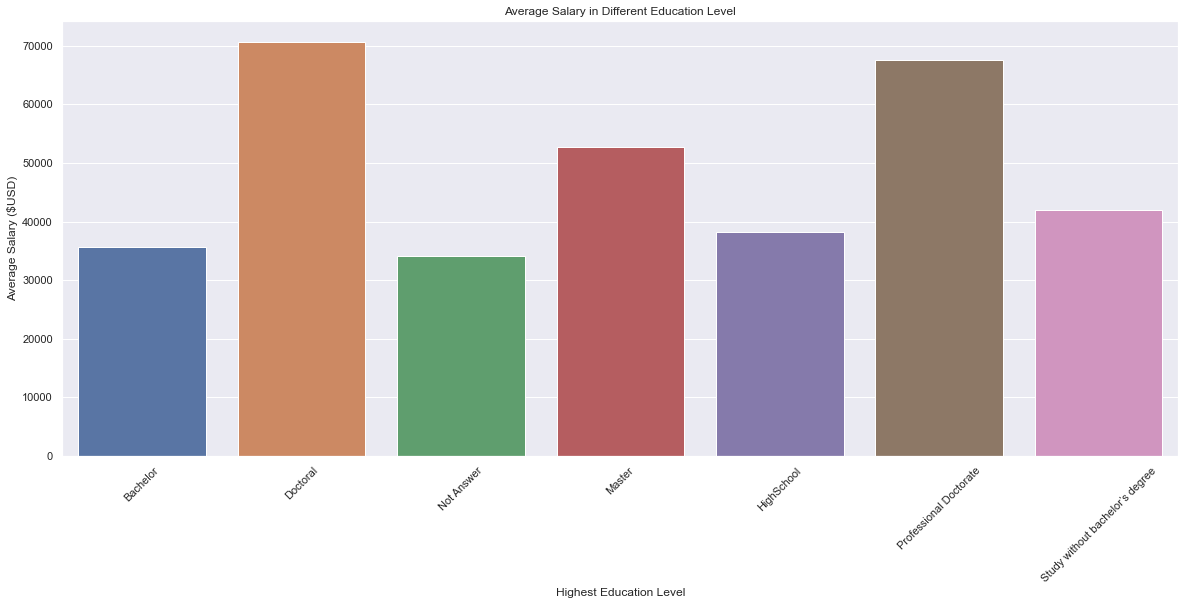

In [10]:
#Plot the barplot using the seaborn library to visualize the results
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.barplot(x="Q4", y="Q25", data=education_salary)
ax.set_ylabel("Average Salary ($USD)")
ax.set_xlabel("Highest Education Level")
ax.set_title('Average Salary in Different Education Level')
plt.xticks(rotation=45)
ax.set_xticklabels(['Bachelor','Doctoral','Not Answer','Master','HighSchool','Professional Doctorate','Study without bachelor’s degree'])
plt.show()

**Notice that the average salary of Bechelor's degree is lower than that of college/university study without earning a bachelor’s degree.Intuitively, the higher level of education the higher the salary. So, this counter intuitive results shown by this data may due to the coding experience within each group. Let's validate it using the pivot table below.**


In [11]:
table = pd.pivot_table(df,values='Q25',index='Q6',columns='Q4',aggfunc='mean')
table

Q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
Q6,,,,,,,
1-3 years,23108.680793,34737.500000,15006.410256,31622.042341,17244.444444,33954.545455,26951.428571
10-20 years,73354.838710,90487.051793,36094.594595,87852.009744,50458.333333,63241.935484,82076.271186
20+ years,99580.223881,115881.209503,86606.060606,104449.567723,47465.517241,75898.148148,119771.084337
3-5 years,37820.971867,46816.151203,14194.444444,42545.000000,64480.769231,30884.615385,32420.000000
5-10 years,51630.511464,60788.418708,86651.515152,65360.344828,95045.454545,99259.259259,51008.333333
< 1 years,17685.019841,31280.405405,12628.205128,26798.546210,19755.102041,62851.351351,17402.777778
I have never written code,22330.459770,26910.714286,43602.564103,28945.070423,18560.606061,120230.769231,26853.932584


**Surprisingly, there isn't much difference in average salary between people having the same years of coding experience with Bachelor's degree and without earning a bachelor’s degree. Instead, people without a degree tend to have slightly higher average salary.So we want to analyze other features in the data, such as age, country.**

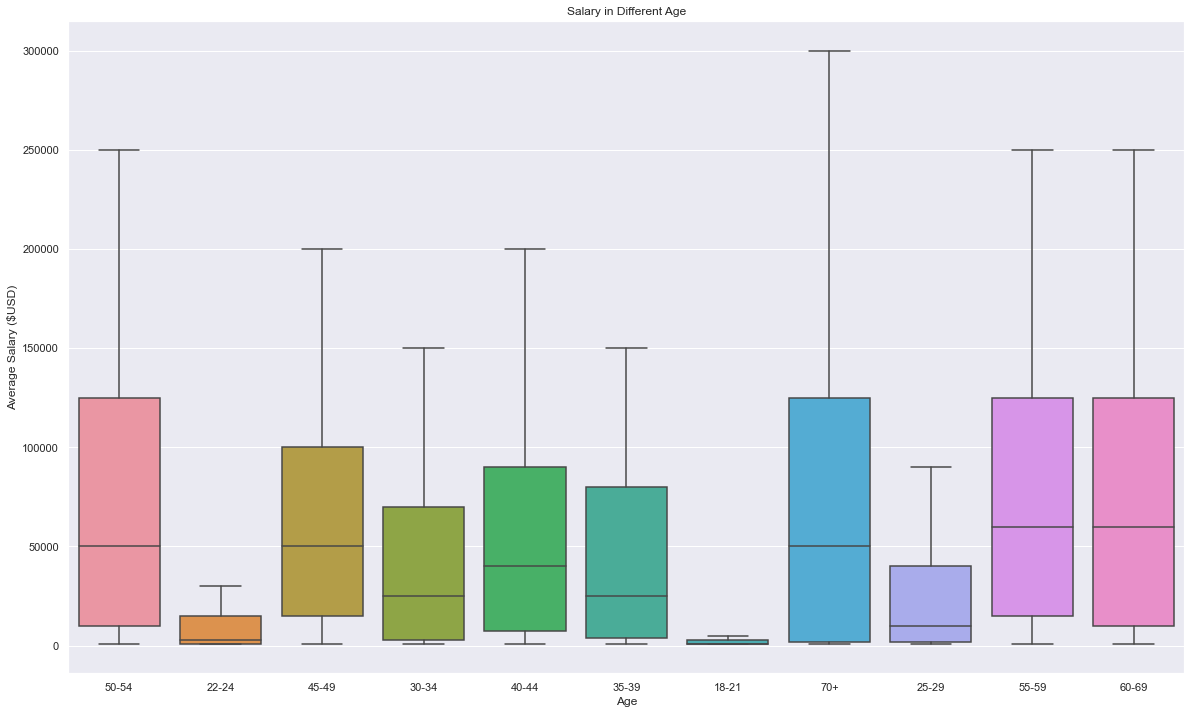

In [12]:
#use boxplot to show quantiles of salary within each age group
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.boxplot(x='Q1', y='Q25', data=df,  showfliers = False)
ax.set_ylabel("Average Salary ($USD)")
ax.set_xlabel('Age')
ax.set_title('Salary in Different Age')
plt.show()

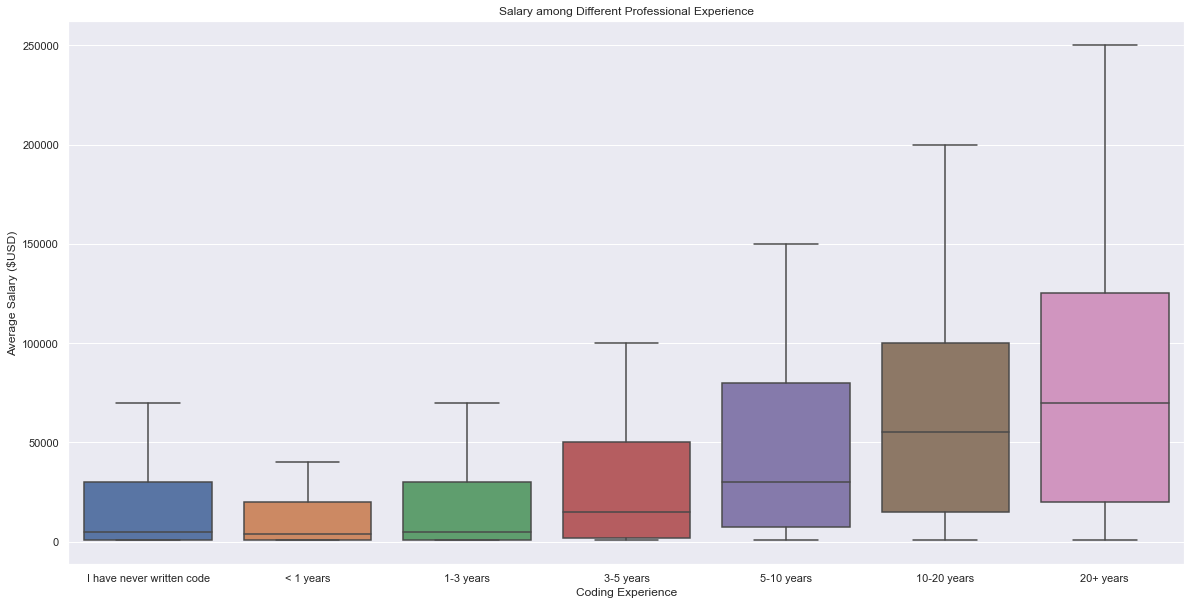

In [13]:
#use boxplot to show quantiles of salary within each coding experience group
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.boxplot(x='Q6', y='Q25', data=df,  showfliers = False, order=['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years'])
ax.set_ylabel("Average Salary ($USD)")
ax.set_xlabel('Coding Experience')
ax.set_title('Salary among Different Professional Experience')
plt.show()

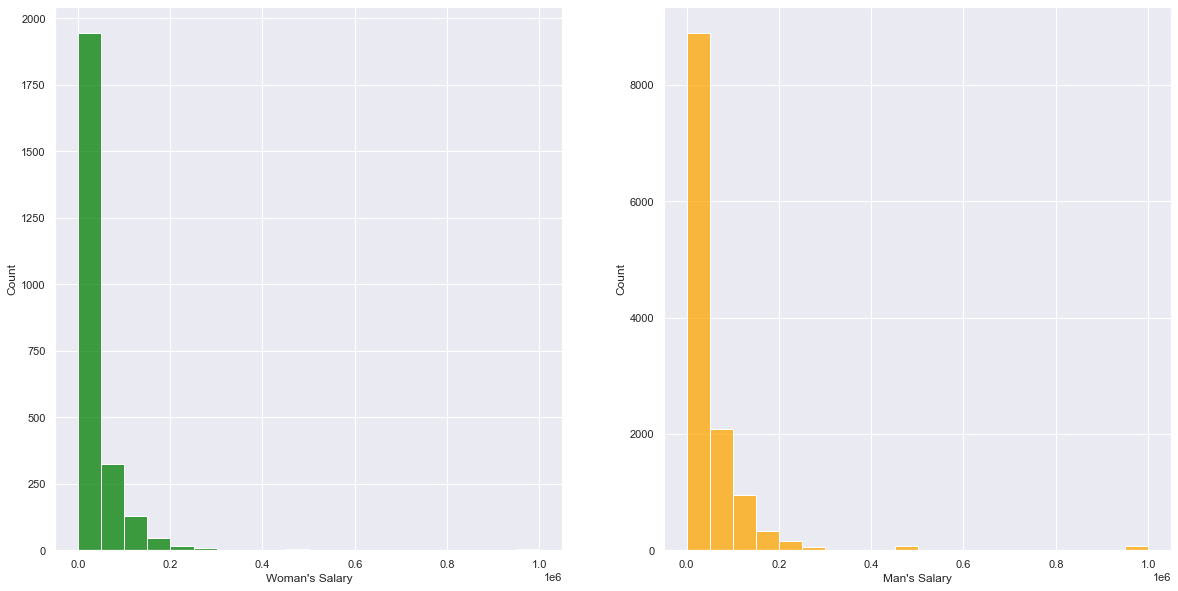

In [14]:
#Compare salary distribution between Man and Woman
ax1 = plt.subplot(121)
sns.histplot(df[df['Q2'] == 'Woman']['Q25'], color='green',bins=20) 
ax2 = plt.subplot(122)
sns.histplot(df[df['Q2'] == 'Man']['Q25'], color='orange',bins=20) 
ax1.set_xlabel("Woman's Salary")
ax2.set_xlabel("Man's Salary")
plt.show()

In [15]:
#select rows which only contains 'Man'and 'Woman' in Q2(gender)
temp=df[df['Q2'].isin(['Man','Woman'])]
temp.Q2.unique()

array(['Man', 'Woman'], dtype=object)

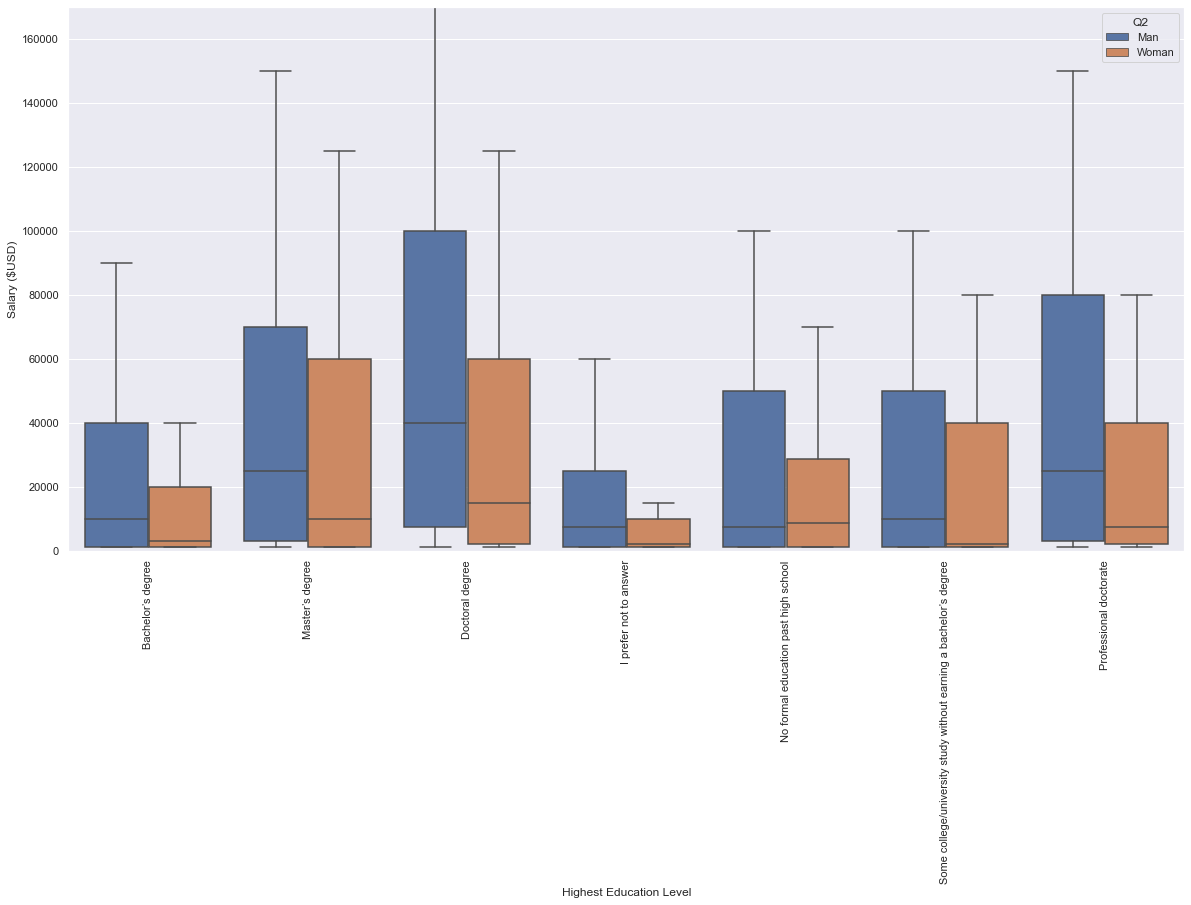

In [16]:
#Compare salary along with education and gender, woman's wage are much lower than man's, except for emplyee with high school diploma
ax = sns.boxplot(x="Q4", y="Q25", hue="Q2",data=temp,  showfliers = False)
plt.xticks(rotation=90)
ax.set_ylabel("Salary ($USD)")
ax.set_xlabel("Highest Education Level")
plt.ylim(0,170000)# Zoom in the plot by limiting the range of y-axis to better see the difference
plt.show()

In [17]:
# count unique values in Country column(Q3)
country_count=df['Q3'].value_counts()
country_count.name = ""
country_count

India                                    3376
United States of America                 1845
Other                                     832
Japan                                     652
Brazil                                    544
                                         ... 
I do not wish to disclose my location      26
Norway                                     26
Uganda                                     24
Algeria                                    23
Kazakhstan                                 22
Name: , Length: 66, dtype: int64

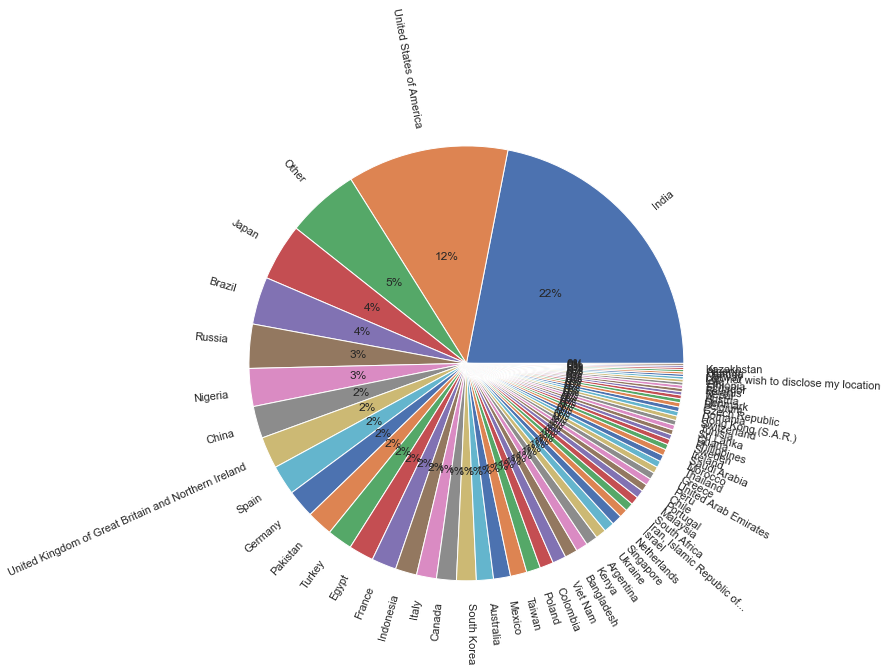

In [18]:
country_count.plot(kind='pie', autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1,rotatelabels=True)
plt.show()

# Question 2: Estimating difference between mean salary of men vs. women

**Part a: Estimating the difference between average salary (Q25) of men vs. women (Q2). Compute and report descriptive statistics for each group (remove missing data, if necessary).**

In [29]:
#create a dataframe contains only woman
female= df[df['Q2'] == 'Woman']['Q25']
female

15         2000
17        30000
19         1000
22        10000
26         5000
          ...  
15340      5000
15354      1000
15361    100000
15370      1000
15375     20000
Name: Q25, Length: 2482, dtype: int64

In [31]:
#Compute and report descriptive statistics for woman's salary
female.describe()

count       2482.000000
mean       34816.881547
std        72017.347888
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        50000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [22]:
#create a dataframe contains only man
male= df[df['Q2'] == 'Man']['Q25']
male

0        30000
1        70000
2         1000
3        40000
4        40000
         ...  
15386     4000
15387    90000
15388    20000
15389     1000
15390     1000
Name: Q25, Length: 12642, dtype: int64

In [23]:
#Compute and report descriptive statistics for man's salary
male.describe()

count      12642.000000
mean       51193.600696
std        99979.274378
min         1000.000000
25%         2000.000000
50%        20000.000000
75%        60000.000000
max      1000000.000000
Name: Q25, dtype: float64

**Part b: If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.**

In [35]:
#check if mean salary between man and woman are significantly different
tc, pc = stats.ttest_ind(female, male)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -7.77406  p = 8.08881e-15


Based on the results from two-sample t-test with a 0.05 threshold, p-value 8.08881e-15 is much lower than 0.05, we conclude that the difference between man and woman is statistically significant.

**Part c: Bootstrap your data for comparing the mean of salary (Q25) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.**

In [52]:
df_array=np.array(df)
df_array

array([[1, 910, '50-54', ..., nan, nan, nan],
       [2, 784, '50-54', ..., nan, 'None', nan],
       [3, 924, '22-24', ..., nan, nan, nan],
       ...,
       [25969, 1756, '30-34', ..., nan, nan, nan],
       [25971, 494, '50-54', ..., nan, 'None', nan],
       [25973, 255, '18-21', ..., nan, 'None', nan]], dtype=object)

In [98]:
mean_woman=[] #store the mean salary of woman for each time of bootstrap
mean_man=[] #store the mean salary of man for each time of bootstrap
for i in range(1000):
    #stratify on gender to make sure number of samples from each group is relative to its size
    a=resample(df_array, replace=True, stratify=df_array[:,3])
    mean_woman.append(a[np.where(a[:,3]=='Woman'),128].mean())
    mean_man.append(a[np.where(a[:,3]=='Man'),128].mean())


In [189]:
len(mean_woman)

1000

In [100]:
mean_man

[50275.31245056162,
 51526.81537731372,
 52337.16975162158,
 51460.68660022148,
 51458.27400727733,
 52095.396298054104,
 53382.49485840848,
 50167.45768074672,
 49150.88593576966,
 50671.768707482996,
 51084.79670938143,
 51119.83863312767,
 52234.21926910299,
 51464.91852554976,
 52766.09713652903,
 50380.99193165638,
 51094.249327638034,
 51095.15899383009,
 50500.83056478405,
 52505.65575067236,
 50531.007751937985,
 51427.02895111533,
 50585.74592627749,
 51861.84939091916,
 50187.114380635976,
 51435.215946843855,
 52096.820123398196,
 50553.55165321943,
 51799.20107577915,
 52339.81964878975,
 50766.45309286506,
 50402.54706533776,
 51300.15029267521,
 51290.53947160259,
 50659.58709065022,
 49693.95665242842,
 51289.98576174656,
 51157.451352634074,
 50991.89210567948,
 52656.06707799399,
 50486.47365923113,
 51060.23572219585,
 52951.787691820915,
 51542.47745609872,
 49369.52222749565,
 51978.52396772663,
 52024.67963929758,
 52523.96772662553,
 50801.13906027527,
 51141.1564

In [103]:
#calculate the difference in means.
diff = np.array(mean_man)-np.array(mean_woman)
diff

array([15429.22058916, 18841.48096958, 18662.51221738, 17179.86468241,
       19489.90172686, 18835.52522634, 20408.68341602, 16718.02174199,
       12826.14782135, 17635.10472682, 17790.07471099, 16387.96917301,
       16870.3997687 , 17822.29161177, 17200.02139116, 14421.88637162,
       14478.81822369, 15639.67954178, 16244.18270016, 16025.59934455,
       15803.36875113, 14646.00558286, 16761.41071274, 18983.12255772,
       16856.7356538 , 16518.61643032, 16999.92246022, 16127.68541631,
       16456.73532235, 15634.74309762, 17041.83584871, 16181.15302827,
       15937.53949493, 16342.3122355 , 15786.50086986, 16079.12989981,
       18328.05989551, 16787.78978938, 15457.04117901, 18802.52155019,
       14954.84593965, 13884.97383662, 21257.38801414, 17158.91581226,
       13909.2079648 , 18924.73669939, 16449.33717354, 15626.70745265,
       14571.88845592, 18242.68748595, 14702.70870374, 16383.17209649,
       17965.75195864, 17925.82353107, 14531.15776416, 16257.79630106,
      

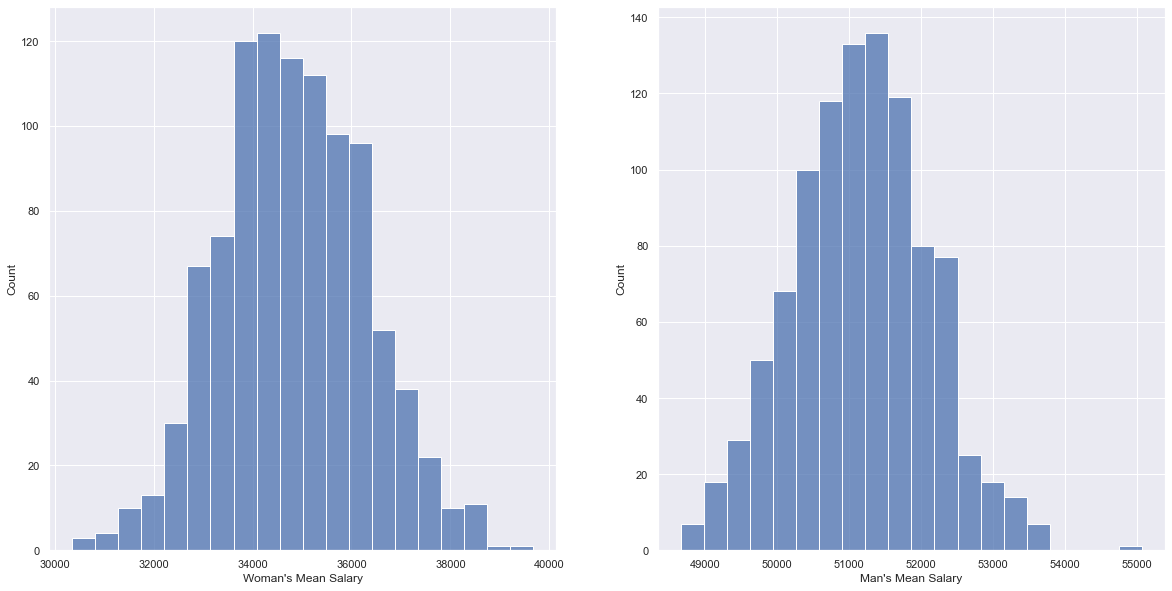

In [197]:
ax1 = plt.subplot(121)
sns.histplot(pd.DataFrame(mean_woman),bins=20,legend=False) 
ax2 = plt.subplot(122)
sns.histplot(pd.DataFrame(mean_man),bins=20,legend=False) 
ax1.set_xlabel("Woman's Mean Salary")
ax2.set_xlabel("Man's Mean Salary")
plt.show()

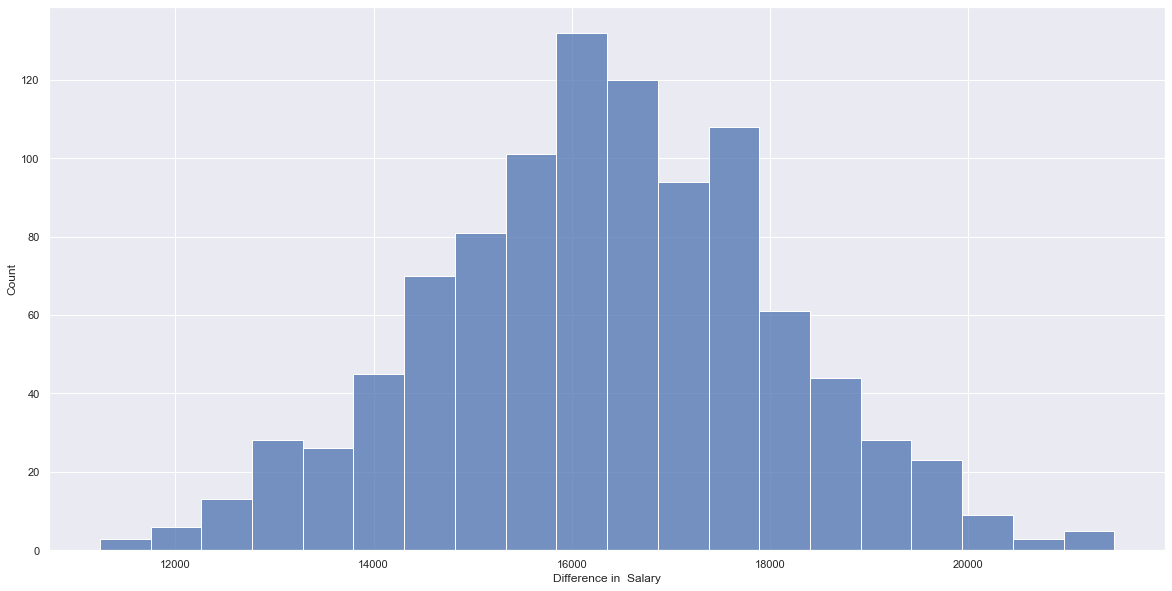

In [119]:
ax=sns.histplot(pd.DataFrame(diff),bins=20,legend=False) 
ax.set_xlabel("Difference in  Salary")
plt.show()

**Part d: If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale.**

In [120]:
tc1, pc1 = stats.ttest_ind(mean_woman, mean_man)
print ("t-test: t = %g  p = %g" % (tc1, pc1))

t-test: t = -298.247  p = 0


# Question 3: Estimating the difference among average salary (Q25) of highest level of formal education(Q4).

**Part a: Compute and report descriptive statistics for each group (remove missing data, if necessary).**

In [125]:
bachelor= df[df['Q4'] == 'Bachelor’s degree']['Q25']
bachelor.describe()

count       4777.000000
mean       35578.291815
std        89382.060777
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        40000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [126]:
master = df[df['Q4'] == 'Master’s degree']['Q25']
master.describe()

count       6799.000000
mean       52706.868657
std        90928.786678
min         1000.000000
25%         3000.000000
50%        25000.000000
75%        70000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [136]:
#Assume doctoral and professional doctorate are considered the same
doctoral = df[df['Q4'] == 'Doctoral degree']['Q25']
professional_doc=df[df['Q4'] == 'Professional doctorate']['Q25']

In [149]:
professional_doc

51       250000
234      100000
278        1000
286       30000
294        1000
          ...  
15260     15000
15262      1000
15272     60000
15276      3000
15377      1000
Name: Q25, Length: 290, dtype: int64

In [150]:
doctoral

3        40000
4        40000
7        80000
10       15000
18        1000
         ...  
15363    25000
15364    15000
15366    15000
15371     3000
15389     1000
Name: Q25, Length: 2217, dtype: int64

In [153]:
#combine doctoral and professional doctoral degree
doctoral_degree=pd.concat([doctoral,professional_doc],ignore_index=False, sort=False)
doctoral_degree.describe()

count       2507.000000
mean       70273.833267
std       119561.065858
min         1000.000000
25%         4000.000000
50%        30000.000000
75%        90000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [156]:
high_school = df[df['Q4'] == 'No formal education past high school']['Q25']
high_school.describe()

count        228.000000
mean       38208.333333
std       100811.090707
min         1000.000000
25%         1000.000000
50%         7500.000000
75%        50000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [157]:
na=df[df['Q4'] == 'I prefer not to answer']['Q25']
na.describe()

count        334.000000
mean       34191.616766
std       113660.692249
min         1000.000000
25%         1000.000000
50%         4000.000000
75%        25000.000000
max      1000000.000000
Name: Q25, dtype: float64

In [158]:
no_bachelor=df[df['Q4'] == 'Some college/university study without earning a bachelor’s degree']['Q25']
no_bachelor.describe()

count        746.000000
mean       41990.616622
std       110270.037272
min         1000.000000
25%         1000.000000
50%        10000.000000
75%        50000.000000
max      1000000.000000
Name: Q25, dtype: float64

**Part b: If suitable, perform ANOVA with a 0.05 threshold for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree). Explain your rationale.**

In [160]:
f_statistic, p_value = stats.f_oneway(bachelor,master,doctoral_degree)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 112.1446910165994, P-Value: 4.786585024917043e-49


**Part c: Bootstrap your data for comparing the mean of salary (Q25) for the three groups.**

In [180]:
#keep only three groups
#drop irrelavant groups: 'No formal education past high school', 'I prefer not to answer', 'Some college/university study without earning a bachelor’s degree'
filtered_df = df.loc[(df['Q4'] == 'Doctoral degree') | (df['Q4'] == 'Professional doctorate')|(df['Q4'] == 'Master’s degree')|(df['Q4'] ==  'Bachelor’s degree')]
filtered_df

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15386,25967,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15387,25968,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15388,25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15389,25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [182]:
filtered_array=np.array(filtered_df)
filtered_array

array([[1, 910, '50-54', ..., nan, nan, nan],
       [2, 784, '50-54', ..., nan, 'None', nan],
       [3, 924, '22-24', ..., nan, nan, nan],
       ...,
       [25969, 1756, '30-34', ..., nan, nan, nan],
       [25971, 494, '50-54', ..., nan, 'None', nan],
       [25973, 255, '18-21', ..., nan, 'None', nan]], dtype=object)

In [192]:
mean_bachelor=[] #store the mean salary of bachelor for each time of bootstrap
mean_master=[] #store the mean salary of master for each time of bootstrap
mean_doc=[] #store the mean salary of doctoral for each time of bootstrap
for i in range(1000):
    #stratify on education to make sure number of samples from each group is relative to its size
    b=resample(filtered_array, replace=True, stratify=filtered_array[:,5])
    mean_bachelor.append(b[np.where(b[:,5]=='Bachelor’s degree'),128].mean())
    mean_master.append(b[np.where(b[:,5]=='Master’s degree'),128].mean())
    mean_doc.append(b[np.where((b[:,5]=='Doctoral degree')|(b[:,5]=='Professional doctorate')),128].mean())


In [193]:
mean_bachelor

[32790.14025539041,
 36158.88633033285,
 38357.0232363408,
 33031.08645593469,
 33775.27737073477,
 38865.606028888425,
 35673.95855139209,
 37118.37973623613,
 35504.71006908101,
 32947.97990370525,
 38590.95666736445,
 36363.19866024701,
 35777.05673016538,
 33884.34163701068,
 35726.50198869583,
 36833.89156374294,
 36844.149047519364,
 37397.11115763031,
 35913.33472890936,
 34586.76993929244,
 35546.57734980113,
 35024.59702742307,
 34995.70860372619,
 35845.82373874817,
 33041.239271509316,
 34960.22608331589,
 37130.31191124136,
 33902.972576931126,
 39035.0638476031,
 37622.775800711745,
 35631.77726606657,
 34229.74670295164,
 35317.24931965669,
 36230.27004396064,
 36137.429348963786,
 38160.35168515805,
 36820.1800293071,
 34925.68557672179,
 36761.14716349173,
 35667.99246388947,
 35497.27862675319,
 33398.05317144652,
 33997.697299560394,
 35446.82855348545,
 34971.11157630312,
 34338.392296420345,
 35529.51643290768,
 34605.400879212895,
 36090.32865815365,
 34791.6056102

In [194]:
mean_master

[53039.49110163259,
 52805.6331813502,
 52515.0757464333,
 52526.033240182376,
 52716.428886600974,
 54767.53934402118,
 52107.5893513752,
 52031.25459626416,
 51948.08060008825,
 52993.60200029416,
 53388.51301662009,
 52543.829974996326,
 52280.85012501838,
 54740.18237976173,
 51918.37034858068,
 52710.177967348136,
 51411.751728195326,
 51404.103544638914,
 52102.07383438741,
 51849.53669657303,
 50437.27018679218,
 51176.93778496838,
 52551.47815855273,
 53207.015737608475,
 53800.55890572143,
 51932.26945138991,
 49307.98646859833,
 52550.74275628769,
 52578.32034122665,
 53189.954405059565,
 52024.41535519929,
 54039.49110163259,
 51078.32034122665,
 51467.8629210178,
 51885.27724665392,
 51036.108251213416,
 52084.64480070599,
 52459.994116781876,
 53081.041329607295,
 50598.76452419473,
 53466.53919694073,
 53019.26753934402,
 51912.192969554344,
 53649.36020002942,
 52127.37167230475,
 52532.35769966171,
 51817.620238270334,
 52341.37373143109,
 51325.709663185764,
 53261.361

In [196]:
mean_doc

[68079.3777423215,
 69104.9062624651,
 65688.67171918628,
 67828.87913841245,
 70801.15676106901,
 72429.79656960511,
 70215.99521340248,
 70458.71559633028,
 70078.579976067,
 66588.55205424811,
 69839.05065815715,
 67570.60231352213,
 68537.49501396091,
 65692.85999202234,
 67613.68169126446,
 72408.85520542481,
 70154.36777024332,
 67727.1639409653,
 71390.70602313522,
 68991.62345432788,
 72205.02592740327,
 65236.13881132828,
 72886.71719186279,
 70749.70083765457,
 67558.43637814121,
 71737.93378540088,
 68804.94615077782,
 69331.87076186677,
 69077.98165137615,
 70989.0307140008,
 72836.65735939369,
 67503.19106501795,
 69166.13482249701,
 69456.92062225768,
 71677.1041084962,
 73089.94814519346,
 70679.29796569605,
 73360.3909054647,
 70588.15317112087,
 68925.60829676905,
 68032.30953330675,
 67261.66733147188,
 73072.19784603111,
 70722.37734343838,
 67713.80135620263,
 68113.0833665736,
 70332.26964499401,
 68301.55564419625,
 72631.83087355405,
 69660.94934184285,
 74027.12

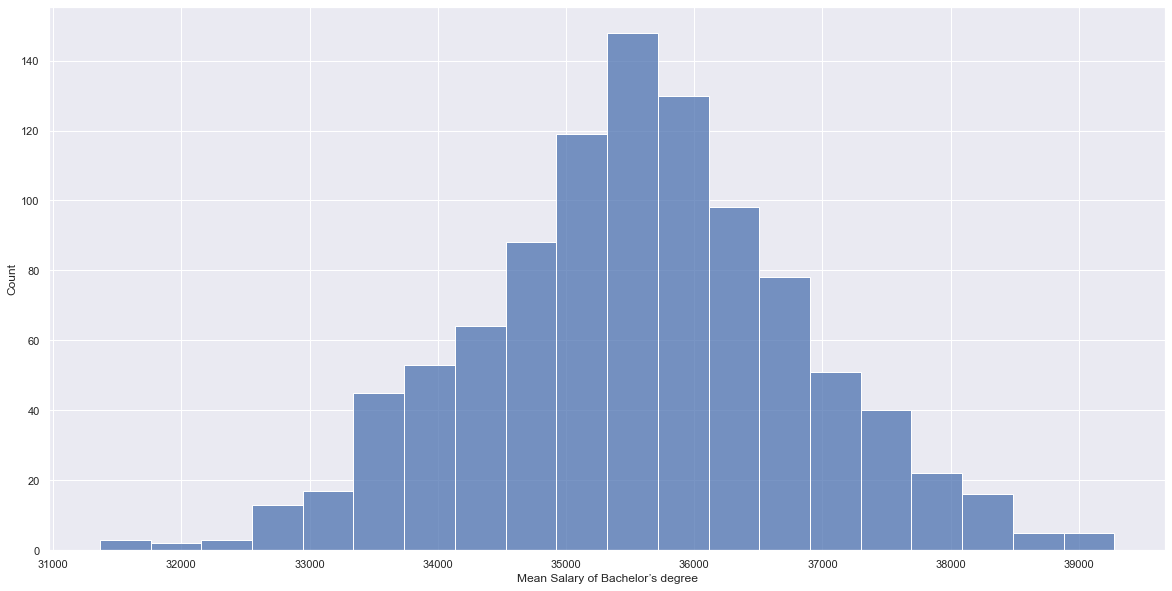

In [199]:
ax5=sns.histplot(pd.DataFrame(mean_bachelor),bins=20,legend=False) 
ax5.set_xlabel("Mean Salary of Bachelor’s degree")
plt.show()

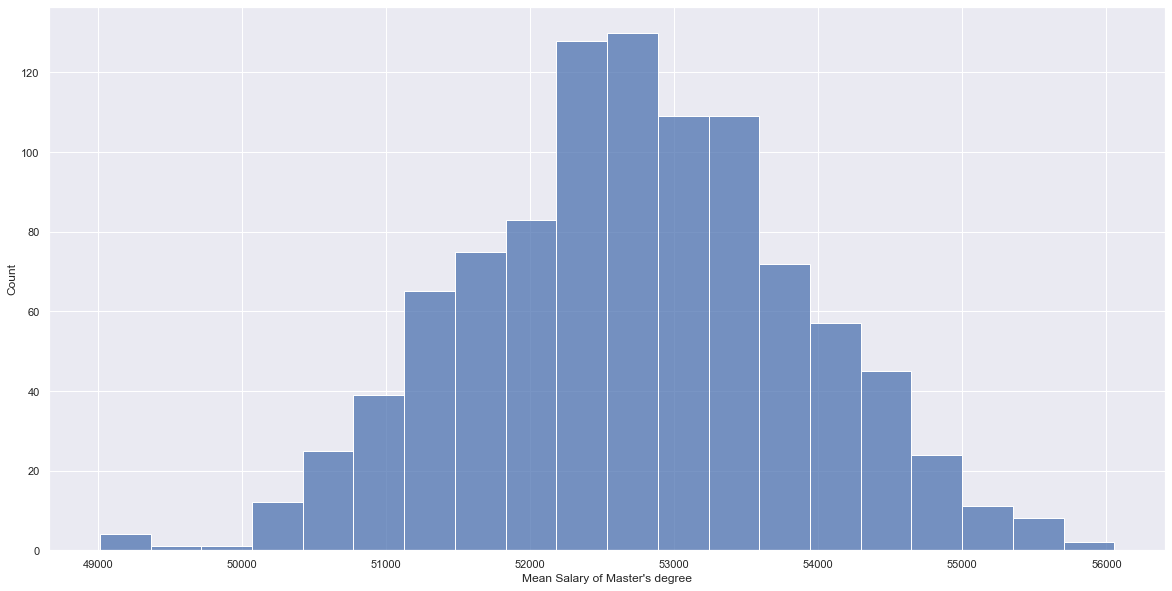

In [201]:
ax6=sns.histplot(pd.DataFrame(mean_master),bins=20,legend=False) 
ax6.set_xlabel("Mean Salary of Master's degree")
plt.show()

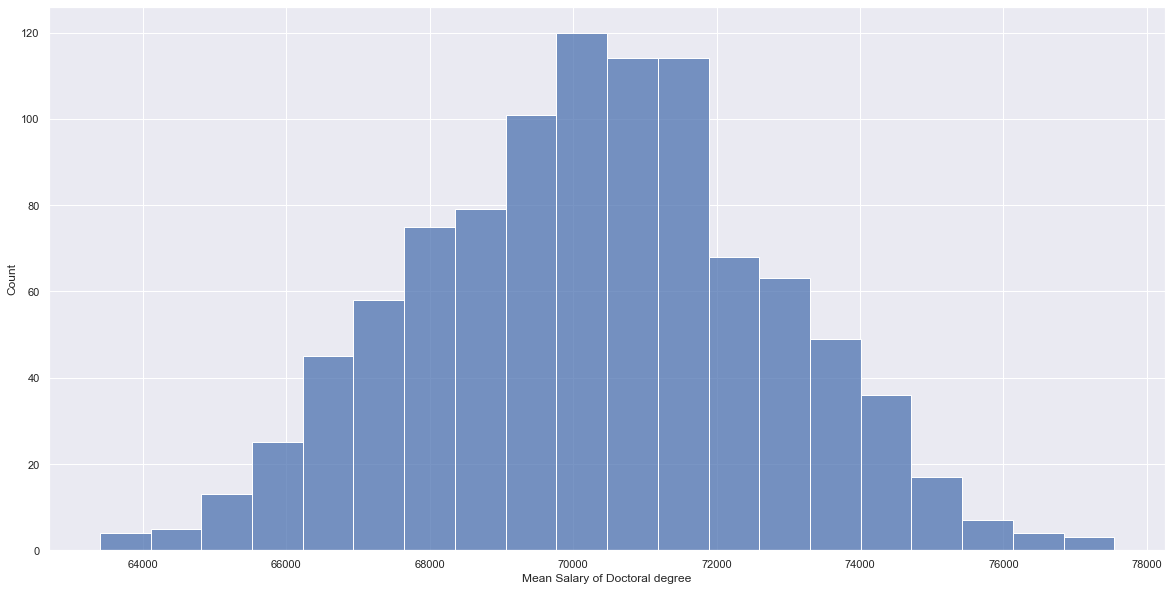

In [203]:
ax7=sns.histplot(pd.DataFrame(mean_doc),bins=20,legend=False)
ax7.set_xlabel("Mean Salary of Doctoral degree")
plt.show()

**Part d: If suitable, perform ANOVA with a 0.05 threshold for bootstrapped data**

In [204]:
f_statistic1, p_value1 = stats.f_oneway(mean_bachelor,mean_master,mean_doc)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic1,p_value1))

F_Statistic: 102267.57650538624, P-Value: 0.0
